#Part A: Bag of Words Experiment
##By group 9: Jordan Moses, Andrew Wilson and Jake Sherman
###Date:11-25-2019
####Description: This notebook will go through various different examples of different Bag of Words experiments for looking at data analysis on text reviews.

#Prepare the Enviornment
All import packages


#Imports


In [0]:
# Jupyter-specific.
%matplotlib inline

# General.

import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
from io import StringIO
import io
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#File uploaded and read into data object

In [0]:
from google.colab import files
uploaded = files.upload()

Saving reduced_amazon_ff_reviews.csv to reduced_amazon_ff_reviews (4).csv


In [0]:
f = open("reduced_amazon_ff_reviews.csv")
data = pd.read_csv(f)
data.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Rating,Time,Summary,Text
0,B001EO5QW8,A39Z97950MCTQE,K. A. Freel,0,0,neutral,1205193600,Hearty Oatmeal,This seems a little more wholesome than some o...
1,B005CJVVJ8,A3BSTFFIKK5YTW,"BOATS99 ""BOATS99""",6,6,positive,1327968000,Never paid that much !,I bought these at Grocery Outlet here in the S...
2,B004V6AH34,ATX44LVZL5JFV,Silvy,1,1,positive,1314403200,not bad for instant healthy coffee,I bought this coffee because its much cheaper ...
3,B001EO5ZMO,A3A4GAPXRX5SHM,markiz,1,3,negative,1282435200,Not a real tea,Herbal additives in this blend destroy real te...
4,B0025WIAN0,A2WT4IIHNFJGYT,Diana KD,0,0,positive,1347321600,"Yum, Yummy, Yummier",These Nature Valley Nut Lovers Variety Pack wa...


####Look as some of the information that we can get from just looking at the data: Different typers of information, and how the information works together.

In [0]:
data.info

<bound method DataFrame.info of         ProductId  ...                                               Text
0      B001EO5QW8  ...  This seems a little more wholesome than some o...
1      B005CJVVJ8  ...  I bought these at Grocery Outlet here in the S...
2      B004V6AH34  ...  I bought this coffee because its much cheaper ...
3      B001EO5ZMO  ...  Herbal additives in this blend destroy real te...
4      B0025WIAN0  ...  These Nature Valley Nut Lovers Variety Pack wa...
...           ...  ...                                                ...
14901  B004CZUOSM  ...  The pizzle twists are short in size. What seem...
14902  B000LKVRQA  ...  I am very disappointed after drinking my first...
14903  B0018CLWM4  ...  When we brought home two 3-month-old purebred ...
14904  B0000D16IP  ...  When I ordered this chutney, it was supposed t...
14905  B003XUL27E  ...  This soup is mostly broth. Although it has a k...

[14906 rows x 9 columns]>

In [0]:
data['Rating'].describe()

count        14906
unique           3
top       positive
freq          6699
Name: Rating, dtype: object

#Bag of Words

####Figure out sum of word in review column

In [0]:
data['count'] = data['Text'].str.count(' ') + 1

In [0]:
sum(data['count'])

1314749

#Vectorizing
####Very important step in preparing the data. We will use tfidf vectorizor in order to get the array of vectors that come from the text of the reviews

In [0]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Text']).toarray()

print(X.shape)
print(vectorizer.get_feature_names())

(14906, 24931)
['00', '000', '004', '008', '00am', '00pm', '01', '02', '03', '030', '0307347346', '03oz', '04', '040', '05', '05140', '056', '05oz', '06', '060', '0684800012', '06oz', '06sep12', '07', '070590080010', '08', '080', '0813819857', '09', '0943151201', '095', '099', '0f', '0g', '0g12', '0g13', '0g8', '0mg', '0z', '10', '100', '1000', '1000mg', '100cal', '100cals', '100g', '100mg', '100s', '100x', '101', '1017', '102', '104', '105', '1050', '108', '10_', '10a', '10days', '10g', '10lb', '10mg', '10min', '10mins', '10minutes', '10oz', '10th', '10x', '11', '110', '110lbs', '110mg', '111', '11164', '112g', '113', '1130', '115', '115mg', '118', '119', '11g', '11l', '11months', '11oz', '11th', '11x17', '12', '120', '1200', '120g', '124', '1240', '125', '125mg', '1266273814', '128', '128078', '129', '1291331352', '12g', '12lb', '12lbs', '12ounce', '12oz', '12pk', '12th', '12yr', '13', '130', '1300', '130mg', '131', '132', '1331447807', '1335229020', '134', '1344600644', '135', '135m

In [0]:
# Set y to be the values from the Helpfullness column
y = data['Rating']

y.head()

0     neutral
1    positive
2    positive
3    negative
4    positive
Name: Rating, dtype: object

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
X_train
y_train

1891      neutral
2998     positive
8922     positive
4111      neutral
5015      neutral
           ...   
5191      neutral
13418    negative
5390     positive
860      negative
7270     positive
Name: Rating, Length: 11924, dtype: object

In [0]:
X_test
y_test

8695    positive
9161    negative
9558    positive
6428     neutral
2554    negative
          ...   
1277    positive
5173    positive
2030     neutral
6045    positive
39      negative
Name: Rating, Length: 2982, dtype: object

#Naive Bayes Model
####One of the more simple data models. Just need to calculate the trains and tests and plug into the function

In [0]:
# Create instance.
model = MultinomialNB()

# Fit to data (also called training the model).
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
y_pred = model.predict(X_test)

print("Accuracy score: ")
accuracy_score(y_test, y_pred)

Accuracy score: 


0.6378269617706237

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model = LogisticRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[ 852   21  198]
 [ 227   96  253]
 [ 147   38 1150]]


#kNN
####View the shape of the data. We will preform some reshaping on the data to make sure everything fits together for the model. We will look at the 5 nearest neighbors by a distance of cosine.

In [0]:
data.shape

(14906, 11)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_trainKnn = scaler.transform(X_train)
X_testKnn = scaler.transform(X_test)

In [0]:
knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn.fit(X_trainKnn, y_train)
preds = knn.predict(X_testKnn)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[627 126 318]
 [265  90 221]
 [427 199 709]]
              precision    recall  f1-score   support

    negative       0.48      0.59      0.52      1071
     neutral       0.22      0.16      0.18       576
    positive       0.57      0.53      0.55      1335

    accuracy                           0.48      2982
   macro avg       0.42      0.42      0.42      2982
weighted avg       0.47      0.48      0.47      2982



In [0]:
accuracy_score(y_test, preds)

0.4782025486250838

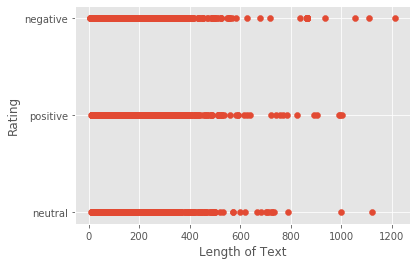

In [0]:
fig = plt.figure()
ax= plt.axes()

ax.set_xlabel('Length of Text')
ax.set_ylabel('Rating')
plt.scatter(data['count'], y)

#Decision Tree
####We will use these methods to calculate the different accuracies for using gini index of entropy for decision trees


Methods for Decision tree found at: 
https://www.geeksforgeeks.org/decision-tree-implementation-python/

In [0]:
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

In [0]:
def train_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

In [0]:
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 

In [0]:
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 
  

In [0]:
clf_gini = train_using_gini(X_train, X_test, y_train) 
clf_entropy = train_using_entropy(X_train, X_test, y_train) 
      
# Operational Phase 
print("Results Using Gini Index:") 
      
# Prediction using gini 
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(y_test, y_pred_gini) 
      
print("Results Using Entropy:") 
# Prediction using entropy 
y_pred_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(y_test, y_pred_entropy) 
      

Results Using Gini Index:
Predicted values:
[2 2 0 ... 2 2 2]
Confusion Matrix:  [[708   0 363]
 [358   0 218]
 [505   0 830]]
Accuracy :  51.57612340710932
Report :                precision    recall  f1-score   support

           0       0.45      0.66      0.54      1071
           1       0.00      0.00      0.00       576
           2       0.59      0.62      0.60      1335

    accuracy                           0.52      2982
   macro avg       0.35      0.43      0.38      2982
weighted avg       0.43      0.52      0.46      2982

Results Using Entropy:


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicted values:
[2 2 0 ... 2 2 2]
Confusion Matrix:  [[712   0 359]
 [342   0 234]
 [503   0 832]]
Accuracy :  51.777330650570086
Report :                precision    recall  f1-score   support

           0       0.46      0.66      0.54      1071
           1       0.00      0.00      0.00       576
           2       0.58      0.62      0.60      1335

    accuracy                           0.52      2982
   macro avg       0.35      0.43      0.38      2982
weighted avg       0.43      0.52      0.46      2982



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#Random Forrest
####Improvement over decision trees, Random forests create many decisions trees and then average out the predictions to give a more accurate assesment of the data.

In [0]:
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
for i in range(14906):
    y_encode = le.fit_transform(data['Rating'])



In [0]:
data.insert(loc = 0, column = 'label', value = y_encode)

In [0]:
y = data['label']
y.head()

0    1
1    2
2    2
3    0
4    2
Name: label, dtype: int64

In [0]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [0]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0) 
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)

In [0]:
 from sklearn.metrics import max_error

max_error(y_test, y_pred)

2.0

In [0]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.3306790457728618

In [0]:
print(regressor.feature_importances_)

[1.99575006e-04 5.16262843e-06 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [0]:
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])
model.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                249320    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 249,331
Trainable params: 249,331
Non-trainable params: 0
_________________________________________________________________


In [0]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))







Training Accuracy: 0.3502
Testing Accuracy:  0.3384


In [0]:
history = model.fit(X_train, y_train,
...                     epochs=100,
...                     verbose=False,
...                     validation_data=(X_test, y_test),
...                     batch_size=10)

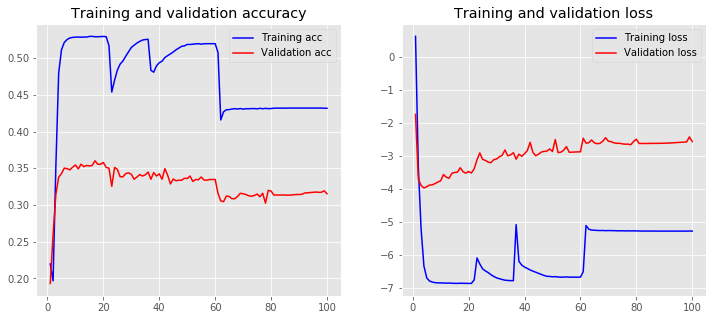

In [0]:
plot_history(history)

#SVM
####We will drop the neutral ratings in favor of a solid positive and negative binary data set.


In [0]:
# extracting two features 
X_SVM = np.column_stack((data['Rating']=='Negative',data['Rating']=='Positive')) 
X_SVM.shape

X_SVM = sc.fit_transform(X_SVM)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_SVM, y, test_size = 0.2, random_state=42)

In [0]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear')

clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_preds = clf.predict(X_test)

In [0]:
accuracy_score(y_test, y_preds)

0.4476861167002012

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1071
           1       0.00      0.00      0.00       576
           2       0.45      1.00      0.62      1335

    accuracy                           0.45      2982
   macro avg       0.15      0.33      0.21      2982
weighted avg       0.20      0.45      0.28      2982



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
